# Iris Insights: Exploratory Data Analysis on the Iris Dataset

## Problem Statement:

We aim to explore the famous Iris dataset using Exploratory Data Analysis (EDA) techniques. By understanding the relationships between different features (petal length, petal width, sepal length, and sepal width) and their impact on the classification of different Iris species, we can extract meaningful insights. This project serves to demonstrate how data visualization and statistical techniques can be used to analyze datasets, detect patterns, and make informed decisions. Additionally, we will implement outlier detection and correlation analysis to enhance model accuracy. The objective of this analysis is to:

* Explore the dataset to understand the relationships between the variables.
* Identify which features are most relevant for distinguishing the species.
* Gain insights that can inform future predictive modeling.

In [1]:
import pandas as pd

# Reading the CSV file
df = pd.read_csv("Iris.csv")

# Printing top 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Understanding the Data :

In [2]:
# Understanding the data: its shape & info.

print(df.shape)

print(df.info())


(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [3]:
# Understanding its Statistical Summary.

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
# Handling missing & duplicate data. 


print(df.isnull().sum())

df.drop_duplicates(inplace=True)


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Exploratory Data Analysis:

### Data Visualisation: 

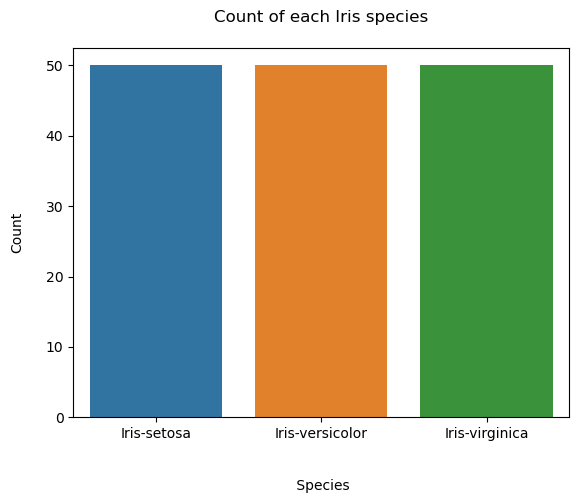

In [7]:
# importing packages for visualisation.
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Species', data=df, ) # Countplot of Target Variable:
                                      #Visualize the target variable, "Species", to ensure balanced data.

plt.title('Count of each Iris species\n')
plt.xlabel('\n\n Species')
plt.ylabel('Count\n')
plt.show()


### Relation between variables

We will see the relationship between the sepal length and sepal width and also between petal length and petal width.

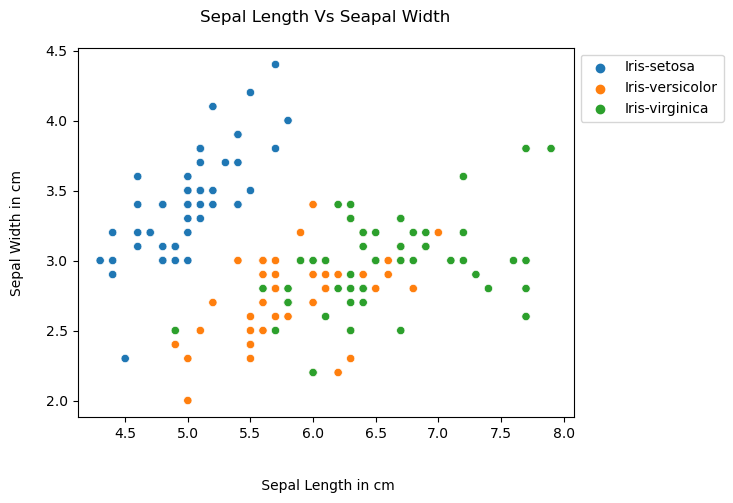

In [8]:

# Comparing Sepal Length and Sepal Width


sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
				hue='Species', data=df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.title('Sepal Length Vs Seapal Width\n')
plt.xlabel('\n\n Sepal Length in cm')
plt.ylabel('Sepal Width in cm\n')
plt.show()

From the above plot, we can infer that – 

* Species Setosa has smaller sepal lengths but larger sepal widths.
* Versicolor Species lies in the middle of the other two species in terms of sepal length and width
* Species Virginica has larger sepal lengths but smaller sepal widths.

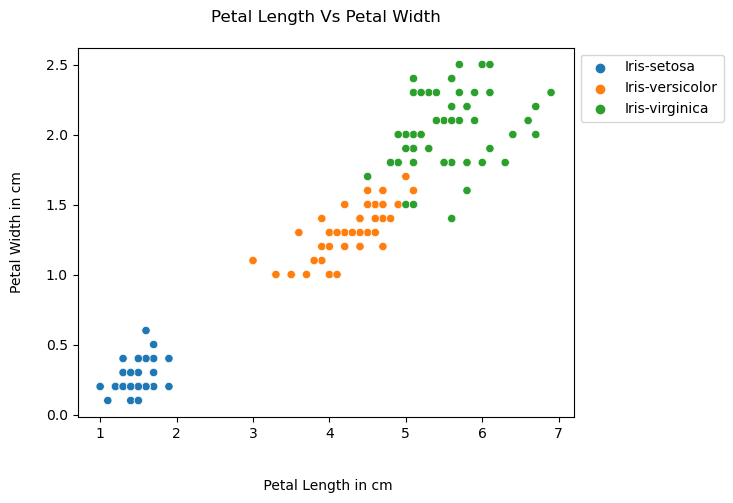

In [9]:
 # Comparing Petal Length and Petal Width
    
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df, )

# Placing Legend outside the Figure

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.title('Petal Length Vs Petal Width\n')
plt.xlabel('\n\n Petal Length in cm')
plt.ylabel('Petal Width in cm\n')

plt.show()

From the above plot, we can infer that – 

* Species Setosa has smaller petal lengths and widths.
* Versicolor Species lies in the middle of the other two species in terms of petal length and width
* Species Virginica has the largest of petal lengths and widths.

Let’s plot all the column’s relationships using a pairplot. It can be used for multivariate analysis.



/Users/akashnileemborgohain/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


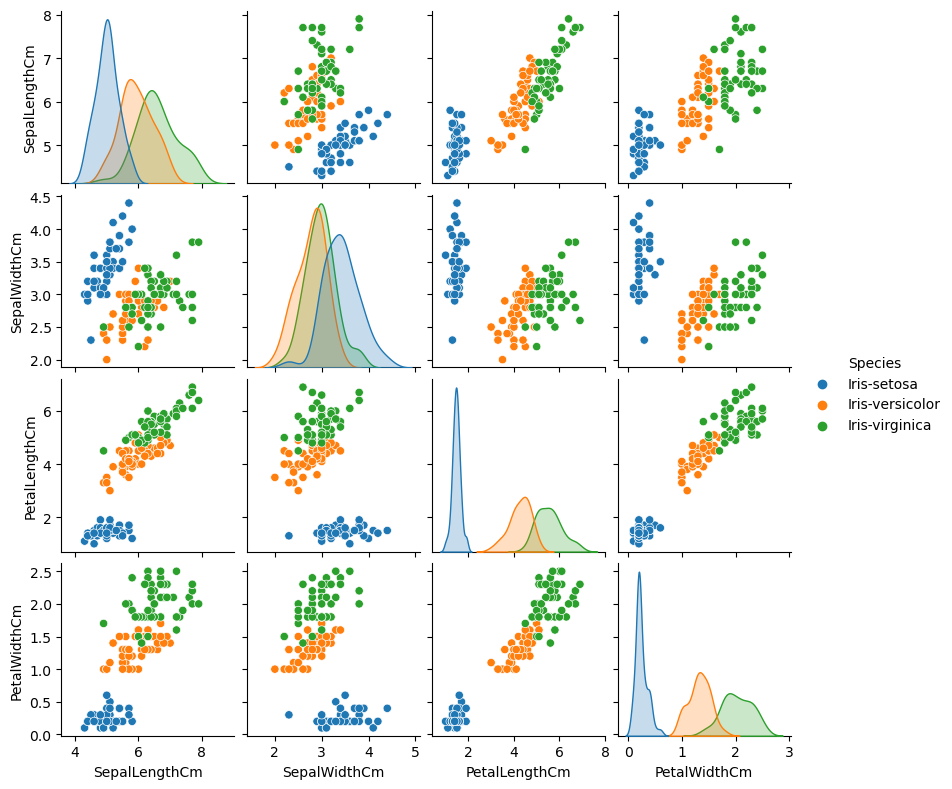

In [10]:
sns.pairplot(df.drop(['Id'], axis = 1), 
             hue='Species', height=2)

We can see many types of relationships from this plot such as the species Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. Such information can be gathered about any other species.

#### Histograms : 

Histograms allow seeing the distribution of data for various columns. It can be used for uni as well as bi-variate analysis.

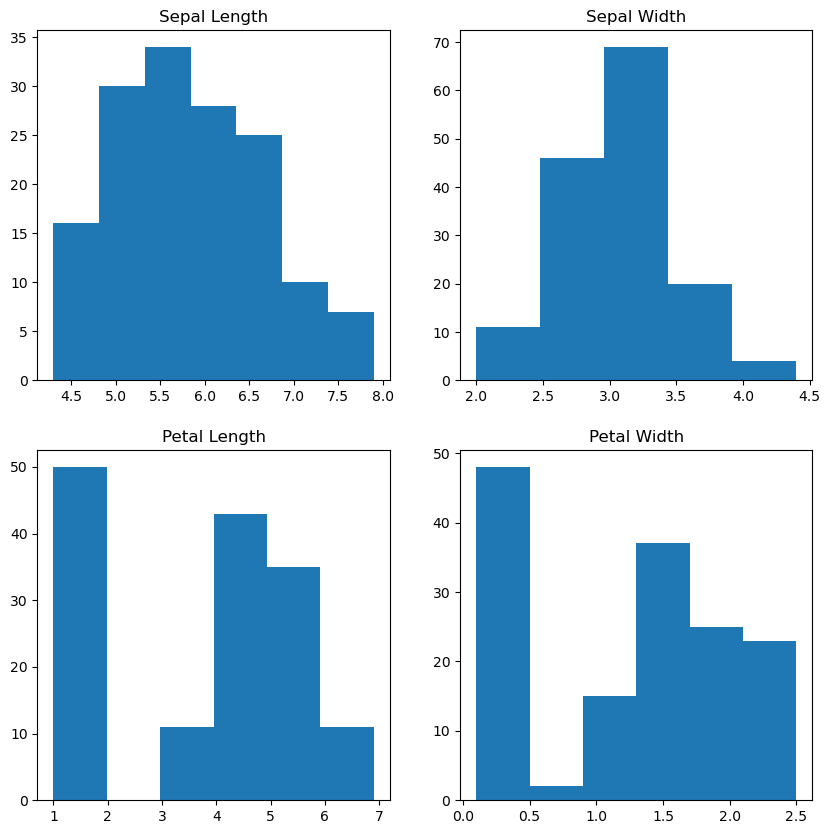

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6);

From the above plot, we can see that – 

* The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6
* The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5
* The highest frequency of the petal length is around 50 which is between 1 and 2
* The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5

#### Histograms with Distplot Plot

Distplot is used basically for the univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

/Users/akashnileemborgohain/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


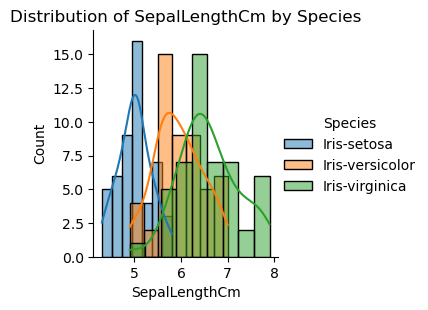

/Users/akashnileemborgohain/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


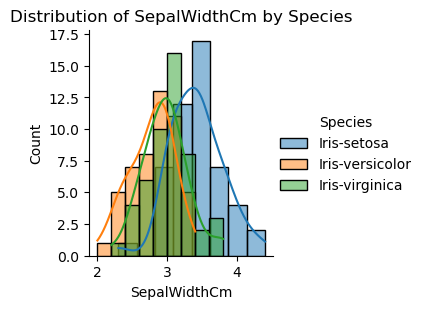

/Users/akashnileemborgohain/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


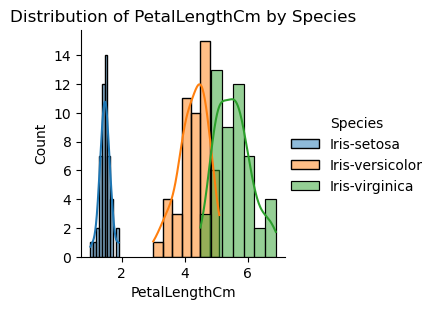

/Users/akashnileemborgohain/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


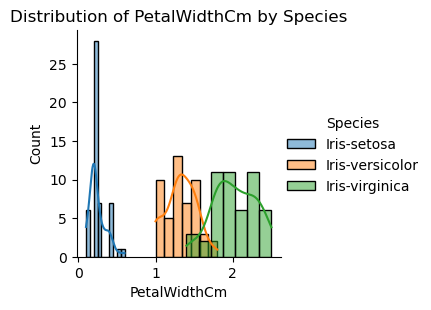

In [12]:
# Create a FacetGrid for each feature using histplot
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for feature in features:
    plot = sns.FacetGrid(df, hue="Species")
    plot.map(sns.histplot, feature, kde=True)  # Adding kde=True for kernel density estimation
    plot.add_legend()
    plt.title(f"Distribution of {feature} by Species")
    plt.show()


From the above plots, we can see that – 

* In the case of Sepal Length, there is a huge amount of overlapping.
* In the case of Sepal Width also, there is a huge amount of overlapping.
* In the case of Petal Length, there is a very little amount of overlapping.
* In the case of Petal Width also, there is a very little amount of overlapping.
* So we can use Petal Length and Petal Width as the classification feature.

### Handling Correlation

We are using Pandas dataframe.corr() to find the pairwise correlation of all columns in the dataframe. Any NA values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [13]:
df.select_dtypes(include=['number']).corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


#### Heatmaps : 

The heatmap is a data visualization technique that is used to analyze the dataset as colors in two dimensions. Basically, it shows a correlation between all numerical variables in the dataset. In simpler terms, we can plot the above-found correlation using the heatmaps.

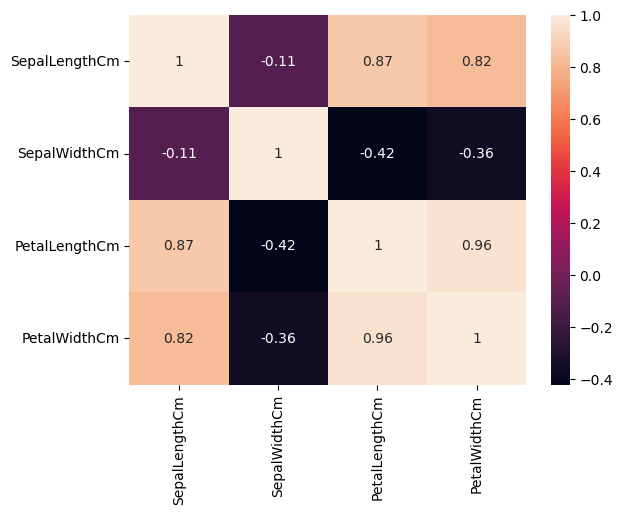

In [14]:
sns.heatmap(df.select_dtypes(include=['number']).corr(method='pearson').drop( 
['Id'], axis=1).drop(['Id'], axis=0), 
            annot = True); 

plt.show()

From the above graph, we can see that –

* Petal width and petal length have high correlations. 
* Petal length and sepal width have good correlations.
* Petal Width and Sepal length have good correlations.

#### Box Plots : 

We can use boxplots to see how the categorical value os distributed with other numerical values.

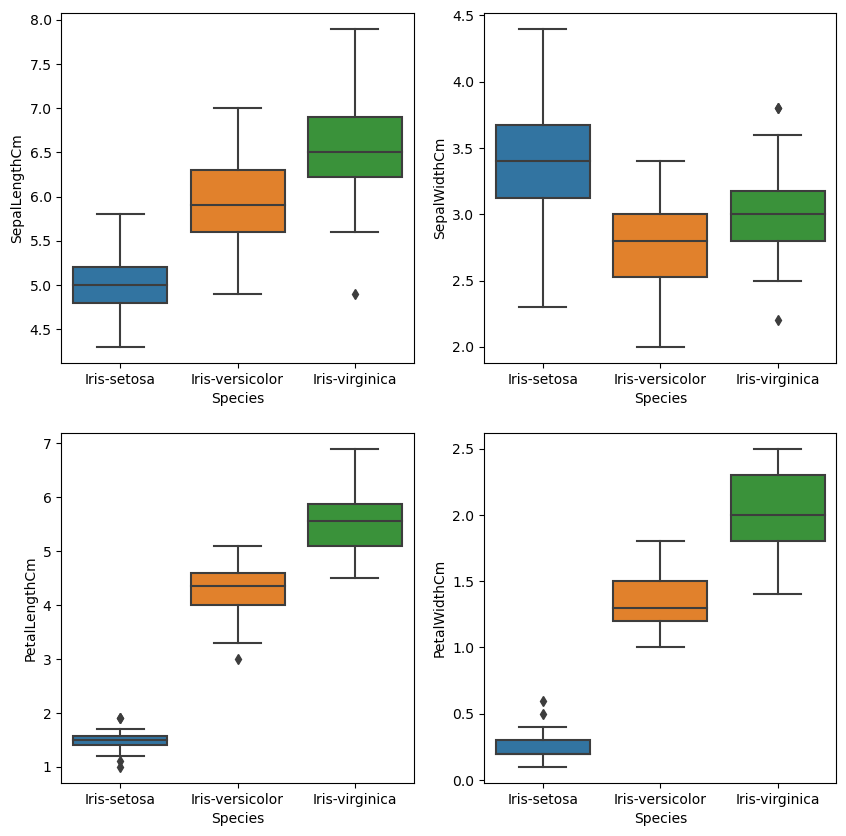

In [15]:
def graph(y):
    sns.boxplot(x="Species", y=y, data=df)

plt.figure(figsize=(10,10))
    
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')

plt.subplot(222)
graph('SepalWidthCm')

plt.subplot(223)
graph('PetalLengthCm')

plt.subplot(224)
graph('PetalWidthCm')

plt.show()

From the above graph, we can see that – 

* Species Setosa has the smallest features and less distributed with some outliers.
* Species Versicolor has the average features.
* Species Virginica has the highest features


### Handling Outliers :

An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s dataframe.

Let’s consider the iris dataset and let’s plot the boxplot for the SepalWidthCm column.

<Axes: xlabel='SepalWidthCm'>

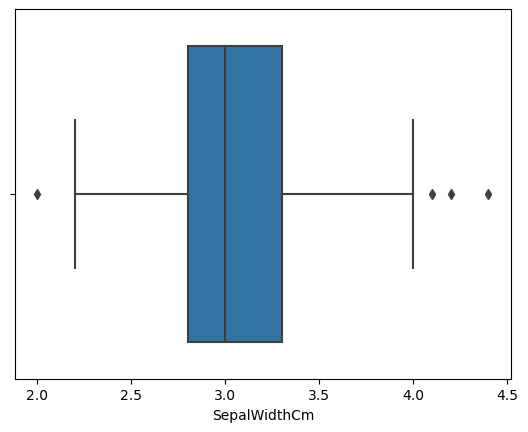

In [16]:
sns.boxplot(x='SepalWidthCm', data=df)

In the above graph, the values above 4 and below 2 are acting as outliers.

### Removing Outliers : 

For removing the outlier, we will follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

Outliers can affect the accuracy of models. We will detect the outliers using IQR and then we will remove them. We will also draw the boxplot to see if the outliers are removed or not. 

##### NOTE : 
* The Interquartile Range (IQR) method is a statistical technique used to measure the spread of data and identify outliers. It focuses on the central 50% of the data, providing a robust measure of variability.

Old Shape:  (150, 6)
New Shape:  (146, 6)


/var/folders/7h/vjjj9rmn6lb12vfvfl5yxc4h0000gn/T/ipykernel_31842/3247783892.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['SepalWidthCm'], 25,
/var/folders/7h/vjjj9rmn6lb12vfvfl5yxc4h0000gn/T/ipykernel_31842/3247783892.py:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['SepalWidthCm'], 75,


<Axes: xlabel='SepalWidthCm'>

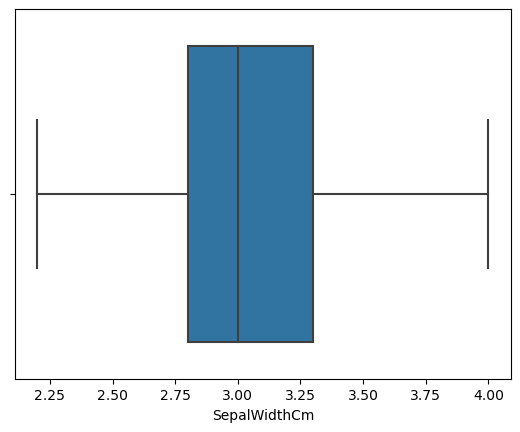

In [17]:
# Importing
import numpy as np


# IQR 
Q1 = np.percentile(df['SepalWidthCm'], 25, 
                interpolation = 'midpoint') 

Q3 = np.percentile(df['SepalWidthCm'], 75, 
                interpolation = 'midpoint') 
IQR = Q3 - Q1 

print("Old Shape: ", df.shape) 

# Upper bound 
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR)) 

# Lower bound 
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR)) 

# Removing the Outliers 
df.drop(upper[0], inplace = True) 
df.drop(lower[0], inplace = True) 

print("New Shape: ", df.shape) 

sns.boxplot(x='SepalWidthCm', data=df)


## Feature Selection for Classification :

After visualizing relationships, we can conclude that Petal Length and Petal Width are the most significant features for distinguishing species.

## Key Insights : 

* Species Distribution: The dataset is balanced, with each species having 50 observations.
* Feature Relationships: Sepal length and width show less distinction between species, while petal length and width offer clearer separation.
* Outliers: Some outliers were detected in SepalWidthCm, but overall the dataset is clean.
* Correlations: Petal length and petal width are highly correlated, making them good candidates for species classification.